<a href="https://colab.research.google.com/github/marcos-code/Pandas/blob/main/Como_Remodelar_o_layout_das_tabelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
titanic = pd.read_csv( "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Classificar linhas de mesa

In [4]:
#Classificar os dados do Titanic de acordo com a idade dos passageiros
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [5]:
#Classificar os dados do Titanic de acordo com a classe da cabine e a idade em ordem decrescente

titanic.sort_values(by=["Pclass","Age"], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


#Formato de mesa longo para amplo
Vamos usar um pequeno subconjunto do conjunto de dados de qualidade do ar. Focamos nos dados e usamos apenas as duas primeiras medições de cada local (ou seja, o chefe de cada grupo). O subconjunto de dados será chamado no2_subset

In [26]:
air_quality = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_long.csv",index_col="date.utc", parse_dates=True)

air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


In [27]:
#Filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]

In [28]:
# Use 2 meansurements (head) for each location (groupby)

no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


In [29]:
# Quero os valores para as três estações como colunas separadas um ao lado do outro

no2_subset.pivot(columns="location", values='value')

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


A função pivot() é puramente remodelação dos dados: é necessário um único valor para cada combinação de índice/coluna.

In [30]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


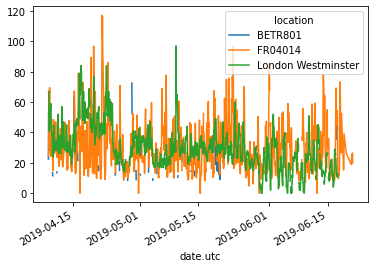

In [33]:
no2.pivot(columns="location", values="value").plot();

In [34]:
# Quero as concentrações medias para e em cada uma das estações em forma de tabela NO2PM2.5

air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


No caso de pivot(), os dados são apenas reorganizados. Quando vários valores precisam ser agregados (neste caso específico, os valores em diferentes etapas de tempo) pivot_table() podem ser usados, fornecendo uma função de agregação (por exemplo, média) sobre como combinar esses valores.

A tabela pivô é um conceito bem conhecido em software de planilha. Quando estiver interessado em colunas de resumo para cada variável separadamente também, coloque o parâmetro para:marginTrue

In [36]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


In [37]:
air_quality.groupby(["parameter", "location"]).mean()

value
parameter location                     
no2       BETR801             26.950920
          FR04014             29.374284
          London Westminster  29.740050
pm25      BETR801             23.169492
          London Westminster  13.443568

#Formato Amplo longo

In [38]:
#começando novamente a aprtir da tabela de formato amplo criada na seção anterior
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


In [40]:
# Coletando todas as medidas de qualidade do ar em uma única coluna (formato longo) NO2
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


O método pandas.melt() em um converte a tabela de dados de amplo formato para formato longo. Os cabeçalhos da coluna tornam-se os nomes de variável em uma coluna recém-criada.DataFrame

A solução é a versão curta sobre como aplicar pandas.melt(). O método derreterá todas as colunas NÃO mencionadas em duas colunas: uma coluna com os nomes do cabeçalho da coluna e uma coluna com os próprios valores. Esta última coluna recebe por padrão o nome .id_varsvalue

O método pandas.melt() pode ser definido com mais detalhes:

In [42]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars = ["BETR801", "FR04014", "London Westminster"],
    value_name= "NO_2",
    var_name="id_location",
    
)
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


O resultado no mesmo, mas em mais detalhes definido:

`value_vars` define explicitamente quais colunas derreter juntos

`value_name`value_name fornece um nome de coluna personalizado para a coluna valores em vez do nome da coluna padrão value

`var_name`var_name fornece um nome de coluna personalizado para a coluna que coleta os nomes do cabeçalho da coluna. Caso contrário, ele pega o nome do índice ou um padrão variable

Assim, os argumentos e são apenas nomes definidos pelo usuário para as duas colunas geradas. As colunas para derreter são definidas por e .value_namevar_nameid_varsvalue_vars